<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Viet_Nam_Current_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [2]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('001'):
    output = 0
  if file.startswith('002'):
    output = 1
  if file.startswith('005'):
    output = 2
  if file.startswith('010'):
    output = 3
  if file.startswith('020'):
    output = 4
  if file.startswith('050'):
    output = 5
  if file.startswith('100'):
    output = 6
  if file.startswith('200'):
    output = 7
  if file.startswith('500'):
    output = 8
  
  photo = load_img(folder + file, target_size=(150,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien_photos.npy', photos)
save('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien_labels.npy', labels)

(901, 150, 200, 3) (901,)


In [25]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [29]:

#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 9

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (150,200, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 150, 200, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 75, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 75, 100, 64)       18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 38, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 38, 50, 128)       73856     
                                                                 
 conv2d_45 (Conv2D)          (None, 38, 50, 128)      

In [30]:
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=10, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.5,1.5], fill_mode="nearest")


In [31]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
20/20 [==============================] - 9s 389ms/step - loss: 2.2030 - accuracy: 0.1111
Epoch 2/50
20/20 [==============================] - 5s 231ms/step - loss: 2.0755 - accuracy: 0.1810
Epoch 3/50
20/20 [==============================] - 6s 325ms/step - loss: 1.9097 - accuracy: 0.2540
Epoch 4/50
20/20 [==============================] - 5s 229ms/step - loss: 1.7061 - accuracy: 0.3206
Epoch 5/50
20/20 [==============================] - 6s 299ms/step - loss: 1.6669 - accuracy: 0.3571
Epoch 6/50
20/20 [==============================] - 5s 255ms/step - loss: 1.4099 - accuracy: 0.4825
Epoch 7/50
20/20 [==============================] - 5s 229ms/step - loss: 1.1027 - accuracy: 0.5714
Epoch 8/50
20/20 [==============================] - 6s 299ms/step - loss: 0.9075 - accuracy: 0.6333
Epoch 9/50
20/20 [==============================] - 5s 230ms/step - loss: 0.8088 - accuracy: 0.6841
Epoch 10/50
20/20 [==============================] - 7s 362ms/step - loss: 0.5540 - accuracy: 0.7921

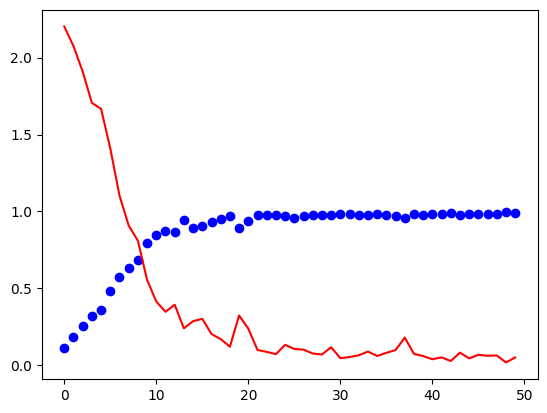

In [32]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()
model.save('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien.h5')

In [33]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/5 Mid-tearm Report/Viet Nam Current Recognition/Tien.h5')

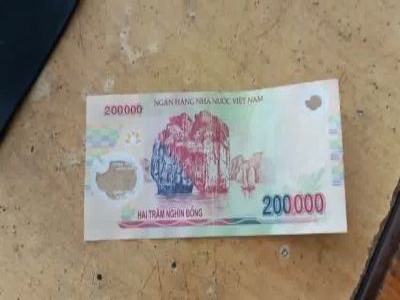

1/1 [==============================] - 0s 46ms/step
['500000 đồng']


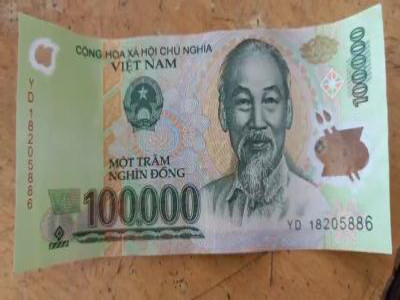

1/1 [==============================] - 0s 32ms/step
['100000 đồng']


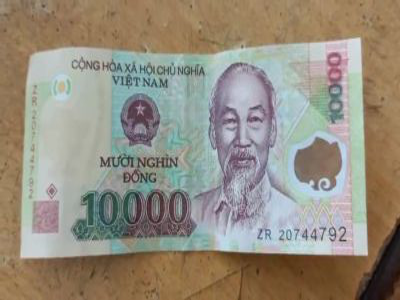

1/1 [==============================] - 0s 38ms/step
['2000 đồng']


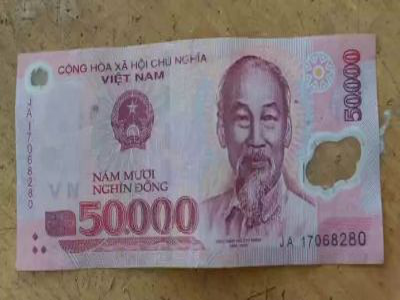

1/1 [==============================] - 0s 58ms/step
['50000 đồng']


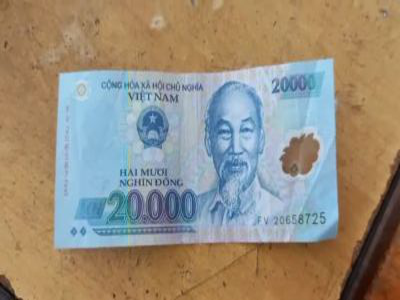

1/1 [==============================] - 0s 38ms/step
['1000 đồng']


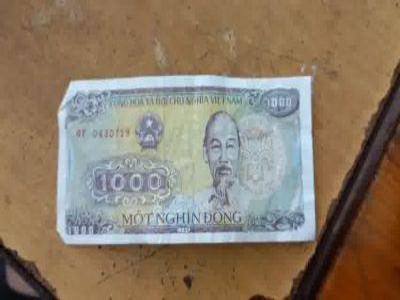

1/1 [==============================] - 0s 27ms/step
['20000 đồng']


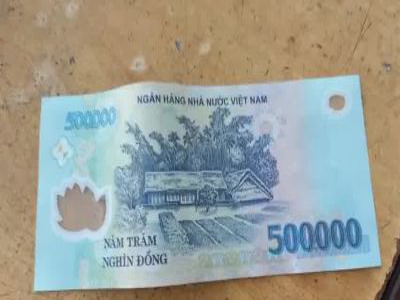

1/1 [==============================] - 0s 26ms/step
['500000 đồng']


In [39]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['1000 đồng', '2000 đồng', '5000 đồng', '10000 đồng', '20000 đồng',
                  '50000 đồng', '100000 đồng', '200000 đồng', '500000 đồng'])


# Kích thước mới của ảnh
new_size = (400, 300)
predict_size = (150, 200)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/AI/5 Mid-tearm Report/Data test/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,150,200,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])
     